# Third Short Home Assignment for VITMAV45 course

The assignment task is to provide weather forecast predictions for dates Oct. 28., Nov. 3. and Nov. 14. using historical weather data.

For the data I have used archived weather data from https://rp5.ru/Weather_archive_in_Budapest,_Lorinc_(airport) archive. The data is from the Budapest, Liszt Ferenc airport's weather station. The data shows hourly temperature values from 2016.10.01 to 2020.10.25.

In [ ]:
# In the development phase the data was stored on Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
# Google Drive path
# data_path = '/content/drive/My Drive/data/rp5_weather.csv'
# Current path
data_path = './rp5_weather.csv'
# Data is read in from the rp5_weather.csv file
full_data = pd.read_csv(data_path,delimiter=';',header=1,decimal=".", skiprows=5)

In [ ]:
# Example rows from rp5_weather.csv
full_data.head(5)

,Local time in Budapest / Lorinc (airport),T,Po,P,Pa,U,DD,Ff,ff10,ff3,N,WW,W1,W2,Tn,Tx,Cl,Nh,H,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
25.10.2020 23:00,12.5,747.3,759.8,-0.2,100.0,Wind blowing from the south-east,1.0,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25.10.2020 22:00,12.5,747.3,759.8,-0.3,100.0,Wind blowing from the east-southeast,1.0,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25.10.2020 21:00,12.5,747.5,760.0,0.1,100.0,"Calm, no wind",0.0,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25.10.2020 20:00,12.6,747.5,760.0,0.3,100.0,"Calm, no wind",0.0,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25.10.2020 19:00,12.6,747.6,760.1,0.5,100.0,Wind blowing from the south-southeast,0.0,NaN,NaN,NaN,,NaN,NaN,NaN,13.2,NaN,NaN,NaN,NaN,NaN,NaN,12.6,10.0,12.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
import datetime
# The dataframe indices are reformatted
full_data.index = [ datetime.datetime
                   .strptime(timestamp, '%d.%m.%Y %H:%M')
                   .strftime('%Y.%m.%d %H:%M') for timestamp in full_data.index]
# Only the dates and temperature values are kept. The rest is thrown away
full_data = full_data.iloc[:, 0:1]

In [ ]:
# Temperature column is renamed
# There was an error during the reading, where the column names got shifted by 1
full_data = full_data.rename(columns={'Local time in Budapest / Lorinc (airport)': 'Temperature'})
full_data.tail()

,Temperature
2016.10.01 04:00,11.8
2016.10.01 03:00,11.8
2016.10.01 02:00,12.0
2016.10.01 01:00,12.4
2016.10.01 00:00,12.7


In [ ]:
# Formatted dataset is written out to a separate file
# full_data.to_csv('/content/drive/My Drive/data/weather_data.csv', index=True)
full_data.to_csv('./weather_data.csv', index=True)

In [ ]:
# Weather data is read in
# weather_data = pd.read_csv('/content/drive/My Drive/data/weather_data.csv', delimiter=',', decimal=".", index_col=0)
weather_data = pd.read_csv('./weather_data.csv', delimiter=',', decimal=".", index_col=0)
weather_data.head()

,Temperature
2020.10.25 23:00,12.5
2020.10.25 22:00,12.5
2020.10.25 21:00,12.5
2020.10.25 20:00,12.6
2020.10.25 19:00,12.6


In [ ]:
# Examples min/max/mean values from the weather dataset
print('max temperature: %.2f' % np.max(weather_data['Temperature']))
print('min temperature: %.2f' % np.min(weather_data['Temperature']))
print('mean temperature: %.2f' % np.mean(weather_data['Temperature']))

max temperature: 38.20
min temperature: -16.40
mean temperature: 12.28


In [ ]:
# The indices are stored as string. It is reformatted to Datetime.
dti = pd.to_datetime(weather_data.index)
weather_data.index = dti
# Daily min, max and mean temperature values are calculated and stored
mean_data = weather_data.resample('D').mean()
max_data = weather_data.resample('D').max()
min_data = weather_data.resample('D').min()
weather_data = pd.DataFrame(data={'mean_temp': mean_data['Temperature'],
                                  'min_temp': min_data['Temperature'],
                                  'max_temp': max_data['Temperature']},
                            index=mean_data.index)
weather_data

,mean_temp,min_temp,max_temp
2016-10-01,16.279167,10.5,22.9
2016-10-02,15.483333,10.9,20.5
2016-10-03,14.662500,12.1,16.6
2016-10-04,11.825000,10.5,13.0
2016-10-05,8.470833,6.3,10.5
...,...,...,...
2020-10-21,10.333333,4.5,17.1
2020-10-22,10.933333,6.3,17.0
2020-10-23,10.183333,5.7,15.4
2020-10-24,11.029167,8.0,14.1


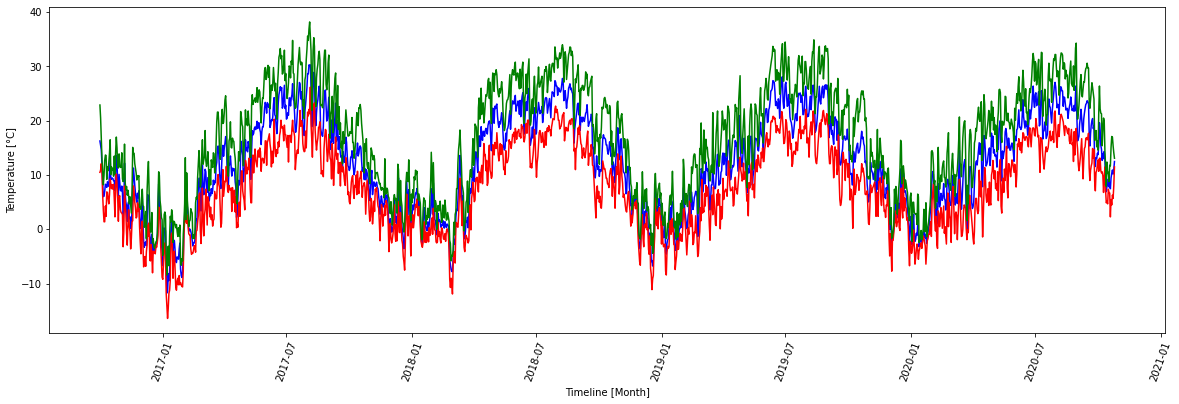

In [ ]:
# The min, max and mean data is plotted.
plt.figure(figsize=(20,6))
plt.plot(weather_data.index, weather_data['mean_temp'], color='b', label='Mean temperature')
plt.plot(weather_data.index, weather_data['min_temp'], color='r', label='Min temperature')
plt.plot(weather_data.index, weather_data['max_temp'], color='g', label='Max temperature')
plt.xticks(rotation=70)
plt.xlabel('Timeline [Month]')
plt.ylabel('Temperature [°C]')
plt.show()

In [ ]:
# Daily average temperature is calculated from max and min data
avg_data = (max_data + min_data) / 2
weather_data['avg_temp'] = avg_data['Temperature']
weather_data.head(5)

,mean_temp,min_temp,max_temp,avg_temp
2016-10-01,16.279167,10.5,22.9,16.70
2016-10-02,15.483333,10.9,20.5,15.70
2016-10-03,14.662500,12.1,16.6,14.35
2016-10-04,11.825000,10.5,13.0,11.75
2016-10-05,8.470833,6.3,10.5,8.40


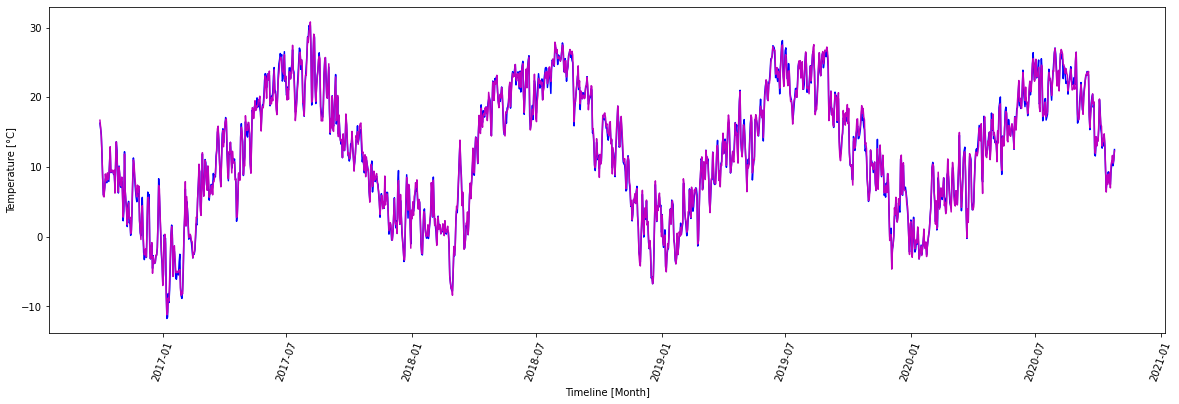

In [ ]:
# The mean and average weather data is plotted for comparison
# The mean data is calculated from the average of the hourly temperature values
# The avg data is calculated from the average of the min and max values
plt.figure(figsize=(20,6))
plt.plot(weather_data.index, weather_data['mean_temp'], color='b', label='Mean temperature')
plt.plot(weather_data.index, weather_data['avg_temp'], color='m', label='Average temperature')
plt.xticks(rotation=70)
plt.xlabel('Timeline [Month]')
plt.ylabel('Temperature [°C]')
plt.show()

In [ ]:
# Shape of the current weather data
weather_data.shape

(1486, 4)

In [ ]:
def create_dates(start, days):
    '''
        Method that creates a Datetime dataframe for the days which are to be
        forecasted.

        Parameters
        ----------
        start : Datetime
            Starting date of the forecast DataFrame
        
        days  : int
            Number of the dates that are to be stored in the
            DataFrame

    '''
    # Creates a date Series from start with days length.
    dates = pd.date_range(start=start, periods=days+1, freq='D', closed='right')
    # DataFrame is created. It only contains the indices.
    forecast = pd.DataFrame(index=dates)
    return forecast

In [ ]:
def train_test_split(input_data, ratio):
    '''
        Splits the input dataset to a train and test dataset.

        Parameters
        ----------
        data : DataFrame
            Input weather forecast data
        
        ratio: float
            Ratio of the train/test size

        Returns
        -------
        train : DataFrame
            Contains the training data
        
        test : DataFrame
            Contains the test data

        split_row : int
            Gives the length of the training dataset

    '''
    # Length of the input dataset
    nrow = len(input_data.index)
    # Training datalength is counted
    split_row = int((nrow)*ratio)
    # The input data is separated to training and test data
    train = input_data.iloc[:split_row]
    test = input_data.iloc[split_row:]
    print('Total samples: ',nrow)
    print('Training samples: ',split_row)
    print('Testing samples: ',nrow-split_row)
    return train, test, split_row     

In [ ]:
def data_transformation(train_data, test_data):
    '''
        The method normalizes the training and test dataset.

        Parameters
        ----------
        train_data : DataFrame
            Training dataset

        test_data : DataFrame
            Test dataset

        Returns
        -------
        train_data_scaled_df : DataFrame
            Normalized training data which has the DatetimeIndices of the original
            dataset.
        
        test_data_scaled_df : DataFrame
            Normalized test data which has the DatetimeIndices of the original
            dataset.
        
        scaler : MinMaxScaler
            Scaler used during normalization
    '''
    from sklearn.preprocessing import MinMaxScaler
    # Dimensional changes
    train_data_exp = np.expand_dims(train_data,-1)
    test_data_exp = np.expand_dims(test_data,-1)
    # Transforms the training and test datasets
    scaler = MinMaxScaler()
    train_data_scaled = scaler.fit_transform(train_data_exp)
    test_data_scaled = scaler.fit_transform(test_data_exp)          
    # Creates dataframes which contains the scaled values and the DatetimeIndices
    train_data_scaled_df = pd.DataFrame(train_data_scaled, index = train_data.index, columns=['Temp'])
    test_data_scaled_df = pd.DataFrame(test_data_scaled,
                                         index = test_data.index, columns=[['Temp']])
    return train_data_scaled_df, test_data_scaled_df, scaler 

In [ ]:
def timeseries_feature_builder(df, lag):
    '''
        This method creates lagging features for the input dataframe. The lagging
        features are shifted in time.

        Parameters
        ----------
        df : DataFrame
            Input dataframe
        lag : int
            The number of lagging features which are to be created. It also 
            represents the maximum amount of lag.

        Returns
        -------
        df_copy : DataFrame
            It contains the input dataframe and the lagging features.
    '''
    # The input dataframe is copied.
    df_copy = df.copy()
    # It iterates till the lag value is reached.
    for i in range(1,lag):
        # The original time-series data is shifted by the iterator value and 
        # it is added to df_copy as a new column.
        df_copy['lag'+str(i)] = df.shift(i)
    return df_copy

In [ ]:
def make_arrays(train_data,test_data):
    '''
        The training and test data is splitted to X/y. The X arrays will contain
        the lagging features and the y will contain the original time-series data.
        The model will have to predict the original data based on the lagging features.

        Parameters
        ----------
        train_data : DataFrame
            Contains the training data with the lagging features
        
        test_data : DataFrame
            Contains the test data with the lagging features

        Returns
        -------
        X_train_data : np.ndarray

        y_train_data : np.ndarray

        X_test_data : np.ndarray

        y_test_data : np.ndarray
    '''
    # Nan values are dropped and the original temperature values are also removed.
    X_train_data = train_data.dropna().drop(train_data.columns[0], axis=1).values
    X_test_data = test_data.dropna().drop(test_data.columns[0], axis=1).values
    # Nan values are dropped and only the original temperature values are stored.
    y_train_data = train_data.dropna()[train_data.columns[0]].values
    y_test_data = test_data.dropna()[test_data.columns[0]].values    
    return X_train_data, y_train_data, X_test_data, y_test_data

In [ ]:
def lstm_model(units, X_train, X_test, y_train, y_test):
    '''
        This method creates the lstm model which will be used for prediction.

        Parameters
        ----------
        X_train : np.ndarray

        y_train : np.ndarray

        X_test : np.ndarray

        y_test : np.ndarray

        Returns
        -------
        model : Sequential
    '''
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import LSTM, Dropout, Dense
    from tensorflow.keras.optimizers import Adam
    # Model creation
    model = Sequential()
    model.add(LSTM(units,return_sequences=True, input_shape=(X_train.shape[1],X_train.shape[2]),kernel_initializer='lecun_uniform'))
    model.add(Dropout(0.2))    
    model.add(LSTM(units, return_sequences=True))
    model.add(Dropout(0.2))    
    model.add(LSTM(units))
    model.add(Dropout(0.2))
    model.add(Dense(1))        
    model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
    # Model is fitted
    model.fit(X_train, y_train, batch_size=120, epochs=2000, validation_split=0.3, verbose=0)
    return model

In [ ]:
def test_model(model, X_test, y_test, scaler, weather_data, split_row, lag):    
    '''
        This method test the model using mean squerad error and inverse transforms
        the predictions using the scaler used for normalizetion.

        Parameters
        ----------
        model : Sequential
        X_test : DataFrame
            Test data used for prediction. It contains the lagging features.

        y_test : DataFrame
            Test data result. It is the original time-series data.

        scaler : MinMaxScaler
            Scaler used for normalizing the test data.

        weather_data : DataFrame
            Original weather dataset.

        split_row : int
            Training data size. Index of the split in train/test.

        lag : int
            Max shift in timescale.
    
        Returns
        -------
        new_test_pred: DataFrame
            Inverse transformed test predictions
    '''
    from sklearn.metrics import mean_squared_error
    # The test result is predicted.
    test_pred = model.predict(X_test)
    # MSE between the real test result and the predicted one.
    mse_test = mean_squared_error(y_test, test_pred)
    print('Test MSE is: %f' % mse_test)

    # Inverse transform of the test result.
    test_pred = scaler.inverse_transform(test_pred)        
    # The test data is copied from the original dataset.
    new_test = weather_data.iloc[split_row:]       
    # The data which is before the lag is removed.
    new_test_pred = new_test.iloc[lag:].copy()
    new_test_pred['Forecast'] = test_pred
    return new_test_pred

In [ ]:
def forecast(model, X_test, test_data, lag, scaler, days):
    '''
        This method forecasts the temperature. The forecast will run with a 
        walk-forward in a for cycle. In every iteration a temperature sequence 
        is predicted. With the help of the lagging features a window can be created 
        which will store the temperature values of the previous days. In every 
        iteration this sequence will be predicted. The first element of each 
        sequence is the last day's predicted temperature. At the end of every 
        iteration the last day's temperature is stored and added start of the 
        window. This way in every iteration the window can be shifted by one day.

        Parameters
        ----------

        model : Sequential
            Model used for prediction.

        X_test : np.ndarray
            Test array containing the lagging features.

        test_data : DataFrame
            Test dataset
        
        lag : int
            Amount of lag
        
        scaler : MinMaxScaler
            Scaler used for normalization during preprocessing. It is used for 
            inverse transformation.

        days : int
            Number of the days which are to be forecasted.

        Returns
        -------
        forecast_data : list
            It contains the forecasted data for the given days in the future.
    '''

    forecast_data = []
    new0 = X_test[-1]        
    last = test_data.iloc[-1]
    new_predict = last[0]
    # Inserts the last days temperature to the array from the original weather data.
    new_array = np.insert(new0, 0, new_predict)        
    # Last element is deleted which is the last lag i.e. the earliest temperature
    # in the window.
    new_array = np.delete(new_array, -1)
    # Reshaping
    new_array_reshape = np.reshape(new_array, (-1,1,lag))
    # The temperature sequence is predicted, inverse transformed and the
    # first forecasted days predicted temperature is stored in forecast_data.
    new_predict = model.predict(new_array_reshape)
    temp_predict = scaler.inverse_transform(new_predict) 
    forecast_data.append(temp_predict[0][0].round(2))
    
    # The previous process is repeated until the forecast is done.
    for i in range(1,days):
        # The last days prediction is stored at the start of the array.
        new_array = np.insert(new_array, 0, new_predict)
        # The last element is deleted so length can be equal to lag.
        new_array = np.delete(new_array, -1)
        # Reshaping
        new_array_reshape = np.reshape(new_array, (-1,1,lag))         
        # Prediction
        new_predict = model.predict(new_array_reshape)
        temp_predict = scaler.inverse_transform(new_predict) 
        # The new forecasted day's temperature is stored.
        forecast_data.append(temp_predict[0][0].round(2))
    return forecast_data 

In [ ]:
def run_lstm(data, lag, split_rate, start_date, days):
    '''
        This method will run the data preprocessing, data splitting, modelling
        and forecasting.

        Parameters
        ----------
        data : DataFrame
            Weather data

        lag : int
            Number of lag days

        split_rate : int        
            Split ratio between training and test data

        start_date : str
            Starting date of the forecasting

        days : int
            Number of days which are to be forecasted
        
        Returns
        -------
        lstm_forecast : list
            Forecasted temperature values
    '''
    # Creates date sequence for the forcast period
    lstm_forecast = create_dates(start_date, days)  
    
    # Data preprocessing

    # Train, test split
    train_data, test_data, split_row = train_test_split(data['Temperature'], split_rate)        
    # Data normalization using MinMaxScaler 
    train_data_scaled_df, test_data_scaled_df, scaler = data_transformation(train_data, test_data)
    # The lagging features are created.
    train_data = timeseries_feature_builder(train_data_scaled_df, lag+1) 
    test_data = timeseries_feature_builder(test_data_scaled_df, lag+1)               
    # Train/test data predictors and results are splitted.
    X_train, y_train, X_test, y_test = make_arrays(train_data, test_data)    
    X_train = np.reshape(X_train, (X_train.shape[0],1,X_train.shape[1]))
    X_test = np.reshape(X_test, (X_test.shape[0],1,X_test.shape[1]))                
    
    # LSTM modelling & forecast

    # Model creation and fitting
    model = lstm_model(30, X_train, X_test, y_train, y_test)
    # Model testing     
    test_pred = test_model(model, X_test, y_test, scaler, data, split_row, lag)        
    # Forecasting
    lstm_forecast['Temp'] = forecast(model, X_test, test_data, lag, scaler, days)       

    # Plot the test results and the forecast
    plt.figure(figsize=(20,5))
    plt.plot(test_pred.index, test_pred['Temperature'], label='test', color='b')
    plt.plot(test_pred.index, test_pred['Forecast'], label='test_prediction', color='g')        
    plt.plot(lstm_forecast, color='r', label='forecast')
    plt.xlabel('Timeline [Month]')
    plt.ylabel('Temperature [°C]')
    plt.legend(loc='upper right')
    plt.title('2019-2020 Temperature Forecast')
    plt.show()        
        
    return lstm_forecast

Total samples:  1486
Training samples:  1188
Testing samples:  298
Test MSE is: 0.005923


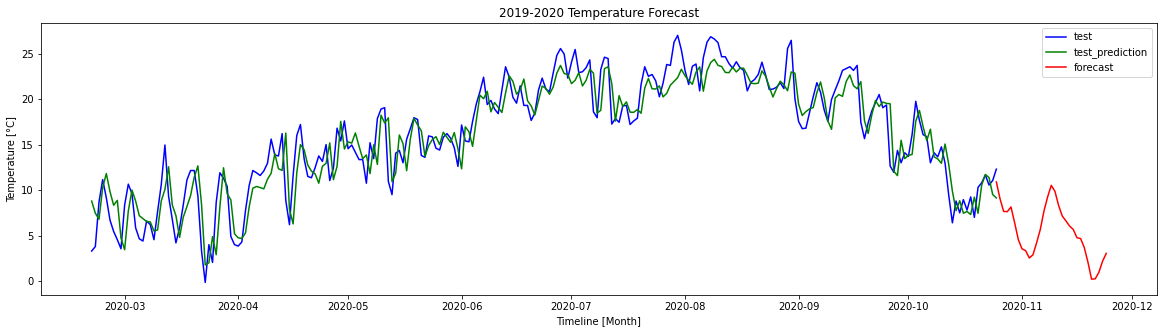

In [ ]:
input_data = pd.DataFrame({'Temperature': weather_data['avg_temp']}, index=weather_data.index)
lstm_prediction = run_lstm(input_data, 50, 0.8, '2020-10-24', 31)

In [ ]:
# Predicted temperature values for the prescribed days
print('2020-10-28 temperature - %.2f' % lstm_prediction.loc['2020-10-28'][0])
print('2020-11-03 temperature - %.2f' % lstm_prediction.loc['2020-11-03'][0])
print('2020-11-24 temperature - %.2f' % lstm_prediction.loc['2020-11-24'][0])

2020-10-28 temperature - 7.63
2020-11-03 temperature - 2.54
2020-11-24 temperature - 3.04
